In [1]:
import sqlite3
print(sqlite3.version)
print(sqlite3.sqlite_version)
conn = sqlite3.connect("Chinook_Sqlite.sqlite")
cursor = conn.cursor()

2.6.0
3.31.1


In [2]:
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

[('Album',), ('Artist',), ('Customer',), ('Employee',), ('Genre',), ('Invoice',), ('InvoiceLine',), ('MediaType',), ('Playlist',), ('PlaylistTrack',), ('Track',)]


1 Basic SQL Queries (20 pts)
Write SQL queries to find the following:

(a) The names of all tracks longer than 15 minutes. Sort the results by TrackId and return
the first 10 songs.

In [3]:
for row in cursor.execute("SELECT Trackid, Name, Milliseconds FROM Track WHERE Milliseconds > 900000 ORDER BY Trackid limit 10;"):
    print(row[1], ": Track id",  row[0])
#cursor.execute("PRAGMA table_info()")
#print(cursor.fetchall())

My Funny Valentine (Live) : Track id 610
Space Truckin' : Track id 620
Going Down / Highway Star : Track id 621
Dazed And Confused : Track id 1581
Dazed And Confused : Track id 1666
We've Got To Get Together/Jingo : Track id 2429
Funky Piano : Track id 2432
Battlestar Galactica: The Story So Far : Track id 2819
Occupation / Precipice : Track id 2820
Exodus, Pt. 1 : Track id 2821


(b) The customer who bought the least amount of tracks. Return the customer name

In [4]:
#cursor.execute("SELECT Customerid, InvoiceId FROM Customer natural join Invoice")
cursor.execute("SELECT Customer.Firstname, Customer.Lastname, count(Customerid) FROM Customer natural join Invoice WHERE Customer.Customerid=Invoice.Customerid GROUP BY Customer.Customerid ORDER BY count(Customerid) limit 1;")
print(cursor.fetchall())

[('Puja', 'Srivastava', 6)]


(c) Find all artists that have more than five albums, return the name and the count of
their albums.

In [5]:
#cursor.execute("SELECT Artistid, count(Artistid) FROM Artist as ar natural join Album as ab where ar.Artistid=ab.Artistid  GROUP BY ar.Artistid")

for row in cursor.execute("SELECT temp.Name, temp.cnt FROM (SELECT Artistid, count(Artistid) as cnt, Name FROM Artist as ar natural join Album as ab where ar.Artistid=ab.Artistid  GROUP BY ar.Artistid) as temp where temp.cnt > 5 ;"):
    print(row[0], row[1])

#cursor.execute("SELECT * FROM Artist")


Led Zeppelin 14
Metallica 10
Deep Purple 11
Iron Maiden 21
Ozzy Osbourne 6
U2 10


(d) Find the albums that appear on more than 5 playlists. Return the album name and
number of playlists they appear on.

In [6]:
for row in cursor.execute("SELECT Title, temp2.cnt2 FROM Album natural join (SELECT temp.Albumid, count(temp.Albumid) as cnt2 FROM (SELECT Albumid, Playlistid as cnt FROM Track as T natural join PlaylistTrack as P where T.Trackid=P.Trackid GROUP BY Albumid, Playlistid) as temp GROUP BY temp.Albumid) as temp2 WHERE temp2.cnt2 > 5 "):
    print(row[0], row[1])


The World of Classical Favourites 6
English Renaissance 6


2 Clustering Artists (20 pts)

In this question, you will gather information on the artists and their tracks, and then
cluster the artists into groups.

(a) Write an SQL query to gather information about the artists, their albums, tracks,
genres, and playlists. Import this information into a pandas data frame. (Note: you
can do this in one big join.) Please include the following columns:
• [PlaylistId][T rackId][T rackN ame][AlbumId][MediaT ypeId]
• [GenreId][Composer][M illseconds][Bytes][UnitP rice]
• [GenreN ame][AlbumT itle][ArtistId][ArtistN ame]
• Their order and naming do not matter.


In [7]:
import pandas as pd
select = "SELECT ar.Artistid, ar.Name, al.Albumid, al.Title, tr.Trackid, tr.Name, tr.MediaTypeid, tr.Genreid, tr.Milliseconds, tr.Bytes, tr.UnitPrice, tr.Composer, pt.Playlistid, ge.Name "
From = "FROM Artist as ar join Album as al, Track as tr, Genre as ge, PlaylistTrack as pt "
Where = "WHERE ar.Artistid=al.Artistid and al.Albumid=tr.Albumid and tr.Genreid=ge.Genreid and tr.Trackid=pt.Trackid "
condition = "ORDER BY ar.Artistid;"
command = select + From + Where + condition
print(command)
#cursor.execute(command)
#cursor.execute(command)
#print(cursor.fetchall())

SELECT ar.Artistid, ar.Name, al.Albumid, al.Title, tr.Trackid, tr.Name, tr.MediaTypeid, tr.Genreid, tr.Milliseconds, tr.Bytes, tr.UnitPrice, tr.Composer, pt.Playlistid, ge.Name FROM Artist as ar join Album as al, Track as tr, Genre as ge, PlaylistTrack as pt WHERE ar.Artistid=al.Artistid and al.Albumid=tr.Albumid and tr.Genreid=ge.Genreid and tr.Trackid=pt.Trackid ORDER BY ar.Artistid;


In [8]:
df_2a = pd.read_sql_query(command, conn)
columns = ['ArtistId', 'ArtistName', 'AlbumId', 'AlbumTitle', 'TrackId', 'TrackName', 'MediaTypeId', 'GenreId', 'MilliSeconds', 'Bytes', 'UnitPrice', 'Composer', 'PlaylistId', 'GenreName'  ]
df_2a.columns = columns
"""for row in cursor.execute(command):
    print(row[0], row[2])"""
df_2a

,ArtistId,ArtistName,AlbumId,AlbumTitle,TrackId,TrackName,MediaTypeId,GenreId,MilliSeconds,Bytes,UnitPrice,Composer,PlaylistId,GenreName
0,1,AC/DC,1,For Those About To Rock We Salute You,1,For Those About To Rock (We Salute You),1,1,343719,11170334,0.99,"Angus Young, Malcolm Young, Brian Johnson",1,Rock
1,1,AC/DC,1,For Those About To Rock We Salute You,6,Put The Finger On You,1,1,205662,6713451,0.99,"Angus Young, Malcolm Young, Brian Johnson",1,Rock
2,1,AC/DC,1,For Those About To Rock We Salute You,7,Let's Get It Up,1,1,233926,7636561,0.99,"Angus Young, Malcolm Young, Brian Johnson",1,Rock
3,1,AC/DC,1,For Those About To Rock We Salute You,8,Inject The Venom,1,1,210834,6852860,0.99,"Angus Young, Malcolm Young, Brian Johnson",1,Rock
4,1,AC/DC,1,For Those About To Rock We Salute You,9,Snowballed,1,1,203102,6599424,0.99,"Angus Young, Malcolm Young, Brian Johnson",1,Rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8710,275,Philip Glass Ensemble,347,Koyaanisqatsi (Soundtrack from the Motion Pict...,3503,Koyaanisqatsi,2,10,206005,3305164,0.99,Philip Glass,1,Soundtrack
8711,275,Philip Glass Ensemble,347,Koyaanisqatsi (Soundtrack from the Motion Pict...,3503,Koyaanisqatsi,2,10,206005,3305164,0.99,Philip Glass,5,Soundtrack
8712,275,Philip Glass Ensemble,347,Koyaanisqatsi (Soundtrack from the Motion Pict...,3503,Koyaanisqatsi,2,10,206005,3305164,0.99,Philip Glass,8,Soundtrack
8713,275,Philip Glass Ensemble,347,Koyaanisqatsi (Soundtrack from the Motion Pict...,3503,Koyaanisqatsi,2,10,206005,3305164,0.99,Philip Glass,12,Soundtrack


(b) Select all the artists that have more than one album (> 1) for the analysis below.

In [9]:
select = "SELECT ar.Artistid, ar.Name, al.Albumid, al.Title, tr.Trackid, tr.Name, tr.MediaTypeid, tr.Genreid, tr.Milliseconds, tr.Bytes, tr.UnitPrice, tr.Composer, pt.Playlistid, ge.Name "
From = "FROM Artist as ar join Album as al, Track as tr, Genre as ge, PlaylistTrack as pt "
Where = "WHERE ar.Artistid=al.Artistid and al.Albumid=tr.Albumid and tr.Genreid=ge.Genreid and tr.Trackid=pt.Trackid "
condition = "GROUP BY ar.Artistid, al.Albumid ORDER BY ar.Artistid;"
command = select + From + Where + condition
df2_b = pd.read_sql_query(command, conn)
columns = ['ArtistId', 'ArtistName', 'AlbumId', 'AlbumTitle', 'TrackId', 'TrackName', 'MediaTypeId', 'GenreId', 'MilliSeconds', 'Bytes', 'UnitPrice', 'Composer', 'PlaylistId', 'GenreName'  ]
df2_b.columns = columns

#num albums
df_tmp = df2_b.loc[:,['ArtistId','AlbumId']]
df_cnt = df_tmp.groupby(df_tmp.ArtistId).count()

artist_list = df_cnt.index
artist_list

#df_tmp = df_tmp[df_tmp.AlbumId>1]
#df_tmp
df_tmp = df_cnt[df_cnt.AlbumId>1]
df_tmp.index

Int64Index([  1,   2,   6,   8,  11,  12,  16,  18,  19,  21,  22,  27,  42,
             50,  51,  52,  53,  54,  58,  59,  68,  76,  77,  80,  81,  82,
             84,  88,  90,  92,  99, 101, 110, 113, 114, 118, 124, 127, 130,
            131, 137, 139, 142, 143, 145, 146, 147, 149, 150, 152, 156, 208,
            226, 245, 248, 252],
           dtype='int64', name='ArtistId')

(c) Construct a set of ten features for each artist: • Genre: Create a numerical feature for each of the top 7 genres that records how many songs the artist has from that genre. (Determine the top 7 genres in the same ways as Q1c.) We note that top 7 are extracted by only considering the T rack table. • Number of albums: Count of how many albums the artist has in the data (note this should be > 1 based on filter above). • Number of tracks: Count of how many tracks the artist has in the data. • Number of playlists: Count of how many playlists that include any track of the artist.

In [10]:
select = "SELECT ar.Artistid, ar.Name, al.Albumid, al.Title, tr.Trackid, tr.Name, tr.MediaTypeid, tr.Genreid, tr.Milliseconds, tr.Bytes, tr.UnitPrice, tr.Composer, pt.Playlistid, ge.Name "
From = "FROM Artist as ar join Album as al, Track as tr, Genre as ge, PlaylistTrack as pt "
Where = "WHERE ar.Artistid=al.Artistid and al.Albumid=tr.Albumid and tr.Genreid=ge.Genreid and tr.Trackid=pt.Trackid "
condition = "GROUP BY ar.Artistid, tr.Trackid ORDER BY ar.Artistid;"

command = select + From + Where + condition
df_tmp = pd.read_sql_query(command, conn)

columns = ['ArtistId', 'ArtistName', 'AlbumId', 'AlbumTitle', 'TrackId', 'TrackName', 'MediaTypeId', 'GenreId', 'MilliSeconds', 'Bytes', 'UnitPrice', 'Composer', 'PlaylistId', 'GenreName'  ]
df_tmp.columns = columns

df_tmp = df_tmp.loc[:,['ArtistId','TrackId']]
df_cnt2 = df_tmp.groupby(df_tmp.ArtistId).count()
df_cnt2


,TrackId
ArtistId,
1,18
2,4
3,15
4,13
5,12
...,...
271,1
272,1
273,1


In [11]:
select = "SELECT ar.Artistid, ar.Name, al.Albumid, al.Title, tr.Trackid, tr.Name, tr.MediaTypeid, tr.Genreid, tr.Milliseconds, tr.Bytes, tr.UnitPrice, tr.Composer, pt.Playlistid, ge.Name "
From = "FROM Artist as ar join Album as al, Track as tr, Genre as ge, PlaylistTrack as pt "
Where = "WHERE ar.Artistid=al.Artistid and al.Albumid=tr.Albumid and tr.Genreid=ge.Genreid and tr.Trackid=pt.Trackid "
condition = "GROUP BY ar.Artistid, pt.Playlistid ORDER BY ar.Artistid;"

command = select + From + Where + condition
df_tmp = pd.read_sql_query(command, conn)

columns = ['ArtistId', 'ArtistName', 'AlbumId', 'AlbumTitle', 'TrackId', 'TrackName', 'MediaTypeId', 'GenreId', 'MilliSeconds', 'Bytes', 'UnitPrice', 'Composer', 'PlaylistId', 'GenreName'  ]
df_tmp.columns = columns

df_tmp = df_tmp.loc[:,['ArtistId','PlaylistId']]
df_cnt3 = df_tmp.groupby(df_tmp.ArtistId).count()
df_cnt3

,PlaylistId
ArtistId,
1,3
2,4
3,3
4,3
5,4
...,...
271,5
272,4
273,4


In [12]:
df_artist = pd.DataFrame(artist_list)
df_c = pd.concat([df_cnt, df_cnt2, df_cnt3], axis=1)

#df_c = df_c[df_c.AlbumId>1]
df_c


,AlbumId,TrackId,PlaylistId
ArtistId,,,
1,2,18,3
2,2,4,4
3,1,15,3
4,1,13,3
5,1,12,4
...,...,...,...
271,1,1,5
272,1,1,4
273,1,1,4


In [13]:
genre = ['ArtistId', 'genre1', 'genre2', 'genre3', 'genre4', 'genre5', 'genre6', 'genre7']
df_rank = pd.DataFrame(columns=genre)
df_rank['ArtistId'] = artist_list
df_rank = df_rank.fillna(0)
df_rank.index = artist_list
df_rank

,ArtistId,genre1,genre2,genre3,genre4,genre5,genre6,genre7
ArtistId,,,,,,,,
1,1,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0
5,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
271,271,0,0,0,0,0,0,0
272,272,0,0,0,0,0,0,0
273,273,0,0,0,0,0,0,0


In [14]:
df_gen = df_2a[['ArtistId', 'GenreId']]
#df_tmp = df_tmp.groupby(['ArtistId', 'GenreId']).count()
for artist in artist_list:
    df_tmp = df_gen[df_gen.ArtistId == artist]
    df_tmp = df_tmp.groupby(df_tmp.GenreId).count()
    df_tmp.columns = ['cnt']
    df_tmp = df_tmp.sort_values(by='cnt', ascending=False)
    for i in range(0, len(df_tmp.index)):
        col = 'genre' + str(i+1)
        df_rank.loc[df_rank.ArtistId==artist, col] = df_tmp.index[i]
        #print(df_rank.loc[df_rank.ArtistId==artist])
        
df_rank


,ArtistId,genre1,genre2,genre3,genre4,genre5,genre6,genre7
ArtistId,,,,,,,,
1,1,1,0,0,0,0,0,0
2,2,1,0,0,0,0,0,0
3,3,1,0,0,0,0,0,0
4,4,1,0,0,0,0,0,0
5,5,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
271,271,24,0,0,0,0,0,0
272,272,24,0,0,0,0,0,0
273,273,24,0,0,0,0,0,0


In [15]:
df_2 = pd.concat([df_rank.iloc[:, 1:], df_c], axis=1)
df_2 = df_2[df_2.AlbumId>1]
df_2

,genre1,genre2,genre3,genre4,genre5,genre6,genre7,AlbumId,TrackId,PlaylistId
ArtistId,,,,,,,,,,
1,1,0,0,0,0,0,0,2,18,3
2,1,0,0,0,0,0,0,2,4,4
6,7,2,0,0,0,0,0,2,31,3
8,23,1,4,0,0,0,0,3,40,3
11,3,0,0,0,0,0,0,2,18,2
12,3,0,0,0,0,0,0,2,17,3
16,7,0,0,0,0,0,0,2,21,4
18,7,0,0,0,0,0,0,2,36,3
19,8,0,0,0,0,0,0,2,31,3


(d) Apply k-means clustering to cluster the artists based on the features above. (Note:
you should have one row of features per artist.) Consider values of k = [2, 4, 6, 8, 10]
and choose an appropriate value of k based on inertia scores. Include a description,
discussion, or plot to support your choice of k.

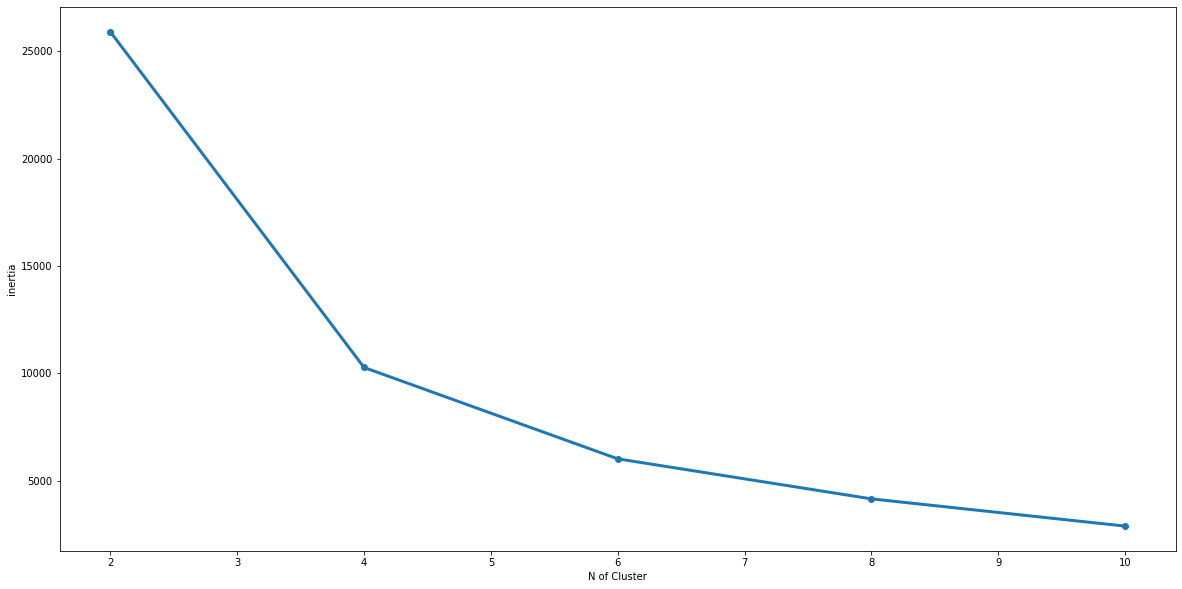

In [16]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

n_clu = [2, 4, 6, 8, 10]
sse = []
for i in n_clu:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_2)
    sse.append(kmeans.inertia_)
    
plt.figure(figsize=(20, 10))
plt.plot(n_clu, sse, linestyle='-', linewidth=3, marker='o')
plt.xlabel('N of Cluster')
plt.ylabel('inertia')
plt.show()

According to the plot above, the elbow point is 4. and I checked the other way to find appropriate value of k. that is KElbowVisualizer.

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


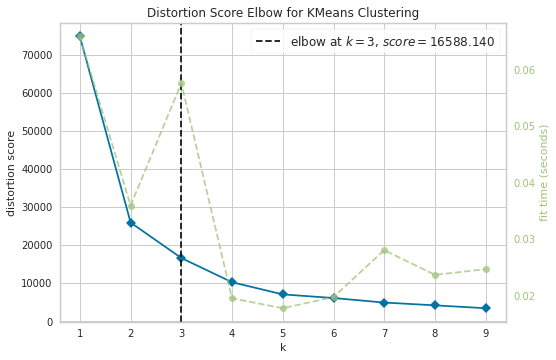

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [17]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visual = KElbowVisualizer(kmeans, k=(1, 10))
visual.fit(df_2)
visual.show()

the plot above shows that there is appropriate values of k when K is 3. but In this case, we have to choose 2 or 4. but I think it is better to choose 4 as number of clusters when comparing two plots above.